<a href="https://colab.research.google.com/github/cvphelps/DeepLearningImplementations/blob/master/KMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

#Setup

Install wandb.

In [0]:
! pip install wandb
! wandb login

In [0]:
from fastai import *
from fastai.vision import *

#import wandb
#from wandb.fastai import WandbCallback

import torchvision
from torchvision.datasets import KMNIST

import numpy as np

Initialize wandb (enter API key).

In [0]:
wandb.init()

In [0]:
! git clone https://github.com/rois-codh/kmnist.git
import os
os.chdir('kmnist')

Cloning into 'kmnist'...
remote: Enumerating objects: 176, done.
remote: Total 176 (delta 0), reused 0 (delta 0), pack-reused 176
Receiving objects: 100% (176/176), 397.30 KiB | 4.01 MiB/s, done.
Resolving deltas: 100% (96/96), done.


#Kuzushiji-MNIST

In [0]:
! python download_data.py

Please select a download option:
1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)
2) Kuzushiji-49 (49 classes, 28x28, 270k examples)
3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)
> 1
Please select a download option:
1) MNIST data format (ubyte.gz)
2) NumPy data format (.npz)
> 2
100% 17954/17954 [00:02<00:00, 7469.22KB/s]
100% 30/30 [00:00<00:00, 238.00KB/s]
100% 3008/3008 [00:01<00:00, 2403.97KB/s]
100% 6/6 [00:00<00:00, 11549.25KB/s]
All dataset files downloaded!


In [0]:
train_imgs = np.load('kmnist-train-imgs.npz')['arr_0']#.reshape((232365, 1, 28, 28))
train_labels = np.int64(np.load('kmnist-train-labels.npz')['arr_0'])

train_imgs = np.expand_dims(train_imgs,axis=1)
train_imgs = np.float32(np.repeat(train_imgs, 3, axis=1))
#train_imgs = (train_imgs-train_imgs.mean()) / train_imgs.std()

test_imgs = np.load('kmnist-test-imgs.npz')['arr_0']#.reshape((38547, 1, 28, 28))
test_labels = np.int64(np.load('kmnist-test-labels.npz')['arr_0'])

test_imgs = np.expand_dims(test_imgs,axis=1)
test_imgs = np.float32(np.repeat(test_imgs, 3, axis=1))
#test_imgs = (test_imgs-test_imgs.mean()) / test_imgs.std()

In [0]:
class NumpyArrayDataset(Dataset):
  
    def __init__(self, x, y):
        self.x, self.y = x, y
        self.c = np.unique(y).size # binary label
        self.classes = ["お", "き", "す", "つ", "な", "は", "ま", "や", "れ", "を"] 
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
        return self.x[i], self.y[i]

In [0]:
train_ds = NumpyArrayDataset(train_imgs, train_labels)
valid_ds = NumpyArrayDataset(test_imgs, test_labels)

data = ImageDataBunch.create(train_ds, valid_ds, bs=128)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: <__main__.NumpyArrayDataset object at 0x7f4617e744e0>;

Valid: <__main__.NumpyArrayDataset object at 0x7f4617e6d6d8>;

Test: None

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy, callback_fns=WandbCallback)
learn.loss_func = torch.nn.functional.cross_entropy
learn.unfreeze()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 128855910.54it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


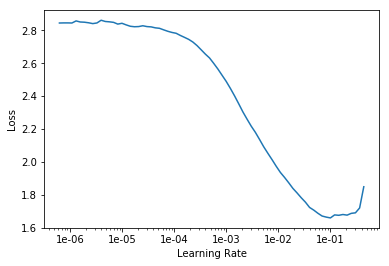

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
%%wandb
learn.fit_one_cycle(10, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.172839,0.377255,0.888600,00:22
1,0.155247,0.453124,0.879900,00:22
2,0.174910,0.516880,0.883600,00:22
3,0.092420,0.678365,0.931300,00:22
4,0.068853,0.209451,0.944100,00:23
5,0.075481,0.789166,0.947800,00:23
6,0.022342,0.133770,0.967300,00:23
7,0.015760,0.147673,0.974100,00:23
8,0.003671,0.189156,0.967900,00:23
9,0.002244,0.158133,0.970900,00:23


#Kuzushiji-49

In [0]:
! python download_data.py

In [0]:
train_imgs = np.load('k49-train-imgs.npz')['arr_0']#.reshape((232365, 1, 28, 28))
train_labels = np.int64(np.load('k49-train-labels.npz')['arr_0'])

train_imgs = np.expand_dims(train_imgs,axis=1)
train_imgs = np.float32(np.repeat(train_imgs, 3, axis=1))
#train_imgs = (train_imgs-train_imgs.mean()) / train_imgs.std()

test_imgs = np.load('k49-test-imgs.npz')['arr_0']#.reshape((38547, 1, 28, 28))
test_labels = np.int64(np.load('k49-test-labels.npz')['arr_0'])

test_imgs = np.expand_dims(test_imgs,axis=1)
test_imgs = np.float32(np.repeat(test_imgs, 3, axis=1))
#test_imgs = (test_imgs-test_imgs.mean()) / test_imgs.std()

In [0]:
class NumpyArrayDataset(Dataset):
  
    def __init__(self, x, y):
        self.x, self.y = x, y
        self.c = np.unique(y).size
        self.classes = ["お", "き", "す", "つ", "な", "は", "ま", "や", "れ", "を"] 
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
        return self.x[i], self.y[i]

In [0]:
train_ds = NumpyArrayDataset(train_imgs, train_labels)
valid_ds = NumpyArrayDataset(test_imgs, test_labels)

data = ImageDataBunch.create(train_ds, valid_ds, bs=128)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: <__main__.NumpyArrayDataset object at 0x7f009e008fd0>;

Valid: <__main__.NumpyArrayDataset object at 0x7f009e008f28>;

Test: None

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy, callback_fns=WandbCallback)
learn.loss_func = torch.nn.functional.cross_entropy
learn.unfreeze()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 148496362.56it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


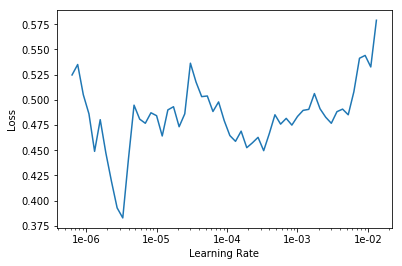

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,4e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.647469,3.644226,0.949983,01:29
1,0.476288,3.069037,0.951125,01:29
2,0.609047,3.452628,0.950943,01:29
3,0.539338,2.595806,0.951825,01:28
4,0.558477,3.319617,0.952162,01:28
5,0.601273,6.037288,0.952344,01:28
6,0.613559,3.024812,0.952759,01:28
7,0.555723,3.344125,0.952422,01:28
8,0.537967,2.825977,0.953226,01:28
9,0.496061,5.678771,0.952707,01:29


In [0]:
#%%wandb
learn.fit(14, lr=slice(1e-3,1e-1))

epoch,train_loss,valid_loss,accuracy,time
0,1.669246,64.265335,0.720134,01:26
1,1.880050,4.767814,0.761330,01:27
2,1.838531,2.468570,0.843360,01:28
3,2.086646,5.525168,0.865956,01:28
4,1.606332,4.618641,0.862090,01:28
5,1.530820,7.780640,0.850520,01:28
6,1.257815,2.509780,0.915143,01:28
7,1.566467,25.449234,0.926713,01:28
8,1.374025,3.327868,0.919812,01:28
9,1.334889,4.652363,0.905622,01:28


#Kuzushiji-Kanji

In [0]:
! python download_data.py

Please select a download option:
1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)
2) Kuzushiji-49 (49 classes, 28x28, 270k examples)
3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)
> 3
Please select a download option:
1) Folders of images (.tar)
> 1
100% 316690/316691 [00:24<00:00, 12868.85KB/s]
All dataset files downloaded!


In [0]:
import tarfile
tar = tarfile.open("kkanji.tar")
tar.extractall()
tar.close()

In [0]:
data = ImageDataBunch.from_folder('kkanji2', valid_pct=0.2, bs = 1024)
data.normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=(accuracy,top_k_accuracy), callback_fns=WandbCallback)

In [0]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


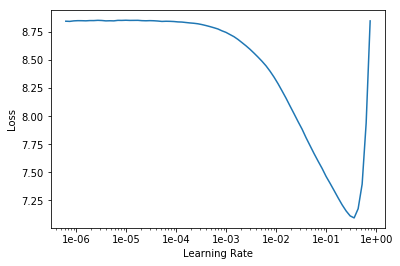

In [0]:
learn.recorder.plot()

In [0]:
#%%wandb
learn.fit_one_cycle(10, max_lr=slice(3e-3,3e-1))

In [0]:
learn.validate(metrics=(accuracy,top_k_accuracy))

#Useless Code

In [0]:
# array to image
arr = (arr-arr.mean()) / arr.std() #normalizes between -1 and +1
arr = (arr + 1) / 2 * 255 # moves it between 0 and 255
arr = np.clip(arr, 0, 255).astype(np.uint8) # clips it between 0 and 255 and converts to 8 bit int.
imageio.imwrite(output_filename, arr)

In [0]:
# Normalization
mean = train_imgs.mean()
std = train_imgs.std()
train_imgs = (train_imgs-mean)/std
test_imgs = (test_imgs-mean)/std

# Numpy to Torch Tensor
train_imgs = torch.from_numpy(np.float32(train_imgs))
train_labels = torch.from_numpy(train_labels.astype(np.long))
test_imgs = torch.from_numpy(np.float32(test_imgs))
test_labels = torch.from_numpy(test_labels.astype(np.long))

train = torch.utils.data.TensorDataset(train_imgs, train_labels)
valid = torch.utils.data.TensorDataset(test_imgs, test_labels)

data = ImageDataBunch.create(train_ds = train, valid_ds=valid)

In [0]:
data = (ItemList.from_array(train_ds = train_array, valid_ds=valid_array, test_ds=test_array), ...)